In [1]:
import cv2
import numpy as np
import os
import PIL
import tensorflow as tf

In [18]:
import pathlib
data_dir = os.path.join(os.getcwd(), 'items')
data_dir = pathlib.Path(data_dir)

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

192


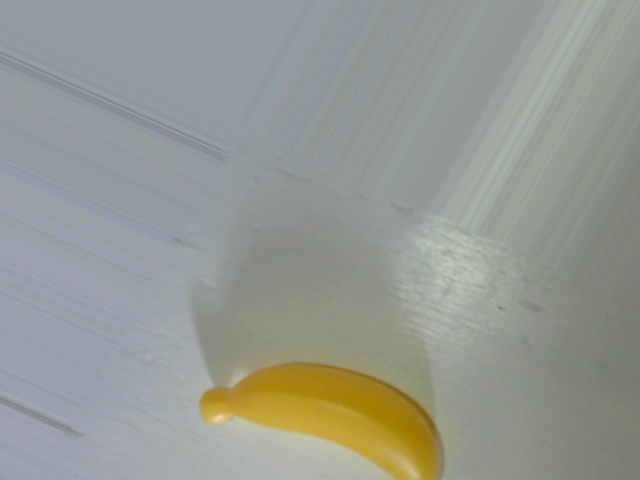

In [53]:
banana = list(data_dir.glob('banana/*'))
PIL.Image.open(str(banana[2]))

In [54]:
img = PIL.Image.open(banana[2])
img1 = np.array(img)
print(img1.shape)

(480, 640, 3)


In [29]:
batch_size = 8

#check that batch size is useable

props = int(image_count/batch_size)

if image_count % batch_size == 0:
    print(f'batch size of {batch_size} is good')
    print(f'model will have {props} progagations')
else:
    print('batch size is no good - please change')

batch size of 8 is good
model will have 24 progagations


In [30]:
img_size = (180,180)

In [64]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset='both',seed=123,image_size=img_size, batch_size=batch_size)

Found 192 files belonging to 4 classes.
Using 154 files for training.
Using 38 files for validation.


In [65]:
class_names = train_ds.class_names
print(class_names)

['banana', 'carrot', 'pepper', 'pickle']


In [66]:
for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 180, 180, 3)
(8,)


In [67]:
normalisation_layer = tf.keras.layers.Rescaling(1./255) #the full stop ensures the returned values is a floating point and not integer

In [68]:
type(train_ds)

tensorflow.python.data.ops.batch_op._BatchDataset

In [70]:
num_classes = len(class_names)
print(num_classes)

4


In [71]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255), #layer inside model to rescale, this simplifies deployment
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [72]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [76]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
20/20 [==============================] - 8s 402ms/step - loss: 0.0169 - accuracy: 0.9935 - val_loss: 0.7440 - val_accuracy: 0.7632
Epoch 2/5
20/20 [==============================] - 8s 403ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.8335 - val_accuracy: 0.7895
Epoch 3/5
20/20 [==============================] - 8s 409ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.8417 - val_accuracy: 0.7632
Epoch 4/5
20/20 [==============================] - 8s 414ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.8693 - val_accuracy: 0.7895
Epoch 5/5
20/20 [==============================] - 9s 417ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.9030 - val_accuracy: 0.7895


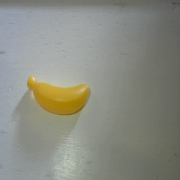

In [134]:

img_file = os.path.join(os.getcwd(),'items','banana','0.jpg')

test_img = tf.keras.utils.load_img(img_file, target_size=img_size)

test_img

In [135]:


test_img = tf.keras.utils.img_to_array(test_img)

test_img = np.expand_dims(test_img, axis=0)

test_img = test_img/255

test_img.shape

(1, 180, 180, 3)

In [136]:
prediction = model.predict(test_img)

classes=np.argmax(prediction,axis=1)


1/1 [==============================] - 0s 87ms/step


In [137]:
print(classes)

[3]


In [139]:
# Output prediction
print(f'Probability that image is a banana is: {prediction} ')

Probability that image is a banana is: [[-71.50861   31.031116  14.313305  57.108818]] 
